# TLM or CTLM Mass Evaluation
Pick a directory, script will look for files _1 _2 _3 _4 _5 and print the results  
Distances, contactlenght or inner_radius in **µm**  
**refine**: cut of all current values below and above the new range in round parenthesis: (start, end)


TLM_S3a2_


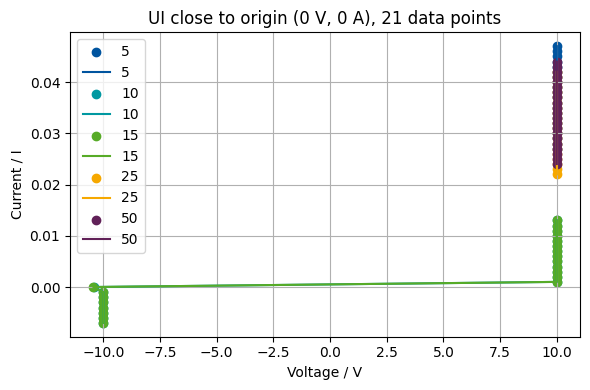

Statistics for Fitting of R Values 
    d / µm | R²     | RT / Ohm
         5 | 0.7493 |   396.4258
        10 | 0.7494 |   396.3625
        15 | 0.7493 |   396.4015
        25 | 0.7494 |   396.3845
        50 | 0.7494 |   396.3859


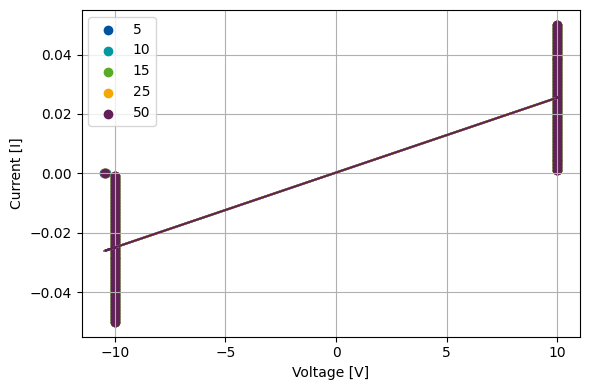

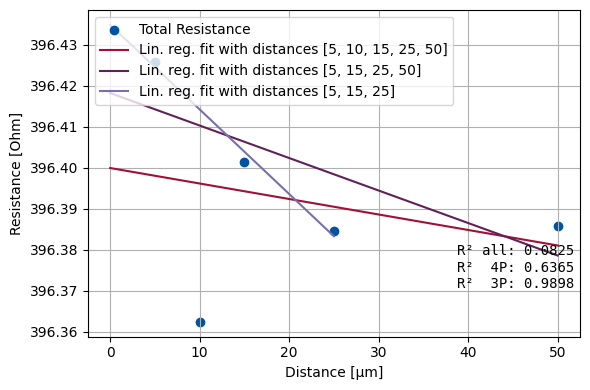

Source directory: C:\Users\gruis\Desktop\Position_L11
Measurement type: TLM
Distances = (5, 10, 15, 25, 50), contact lenght = 50
Feld Rsh      R²     Rc       LT     rhoc      Distances 
-    [Ohm/sq] -      [Ohm mm] [µm]   [Ohm cm²] [µm]
TLM     -0.02 0.0825     9.91 -524842.70 -5.20e+01 [5, 10, 15, 25, 50]  
TLM     -0.04 0.6365     9.91 -250214.86 -2.48e+01 [5, 15, 25, 50]      
TLM     -0.10 0.9898     9.91 -96166.08 -9.53e+00 [5, 15, 25]          


In [7]:
#%matplotlib widget
import ctlmevaluationlib
from pathlib import Path

### ### ### Settings
# ⬐ paste your directory here. Style: r"<path\to\files>". The r is important, also no trailing backslash \ ! ⤵

working_directory = r"C:\Users\gruis\Desktop\Position_L11" # <--- paste your directory here

# ⬑ paste your directory here. Style: r"<path\to\files>". The r is important, also no trailing backslash \ ! ⤴

measurement_type  = "tlm"       # <--- "tlm" or "ctlm"
distances = (5, 10, 15, 25, 50) # in µm; ( 1, 2, 3, 4, 5 ) values in round parenthesis
contactlenght = 50              # in µm; only used by tlm 
inner_radius = 110               # in µm; only used by ctlm 

file_type = "old"                # <--- "new" or "old", "jupyter" or "labview"

refine = False                   # True or False
newrange = (-0.03, 0.03)        # two current values in () round parenthesis

graphs = True                   # True or False, show graphs

zero = True                      # closer look at data points close to origin (0 V, 0 A)
number = 10                      # datapoints close to origin
### ### ### Settings END

wd = Path(working_directory).glob('*_[1-5].txt')

filenames = []
fields = {}
files = []
results = []

for file in wd:
    filenames.append(file.name)
    field, end = file.name.rsplit(sep="_",maxsplit=1)
    if not field in fields:
        fields[field] = 1
    else:
        fields[field] += 1

fields_to_evaluate = {key:val for key, val in fields.items() if val == 5}

for field in fields_to_evaluate:
    print(field)
    files = list(Path(working_directory).glob(f'*{field}_[1-5].txt'))
    tlm = ctlmevaluationlib.CTLMandTLMMeasurement(measurement_type, files, distances, contactlenght, inner_radius, output=False, file_type=file_type)
    if refine:
        tlm.refine_evaluated_range(newrange)
    if zero:
        tlm.plotclosetozero(size=(6,4), number=number)
    if graphs:
        print(tlm.R_statistics)
        tlm.uigraph(size=(6,4))
        tlm.rtgraph(size=(6,4))
    results.append(tlm.build_results(header=False))

print(f"Source directory: {working_directory}\nMeasurement type: {measurement_type.upper()}")
if measurement_type == "tlm":
    print(f"Distances = {tlm.distances}, contact lenght = {tlm.contactlenght}")
if measurement_type == "ctlm":
    pass
    print(f"Distances = {tlm.distances}, inner radius = {tlm.inner_radius}, inner circumference = {tlm.inner_circumference:.2f}")
print("Feld Rsh      R²     Rc       LT     rhoc      Distances \n", "-    [Ohm/sq] -      [Ohm mm] [µm]   [Ohm cm²] [µm]", sep = "")
for r in results:
    print(r, end="")